In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

In [4]:
ins_data = pd.read_csv('insurance.csv')
ins_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Target Variable - charges

## Exploratory Data Analysis

In [5]:
# To check the info of the dataset.
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# To check the shape of the dataset.
ins_data.shape

(1338, 7)

In [7]:
# To perform descriptive statistics.
ins_data.describe(include = 'all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [8]:
# To check for null values.
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in this dataset.

<Axes: >

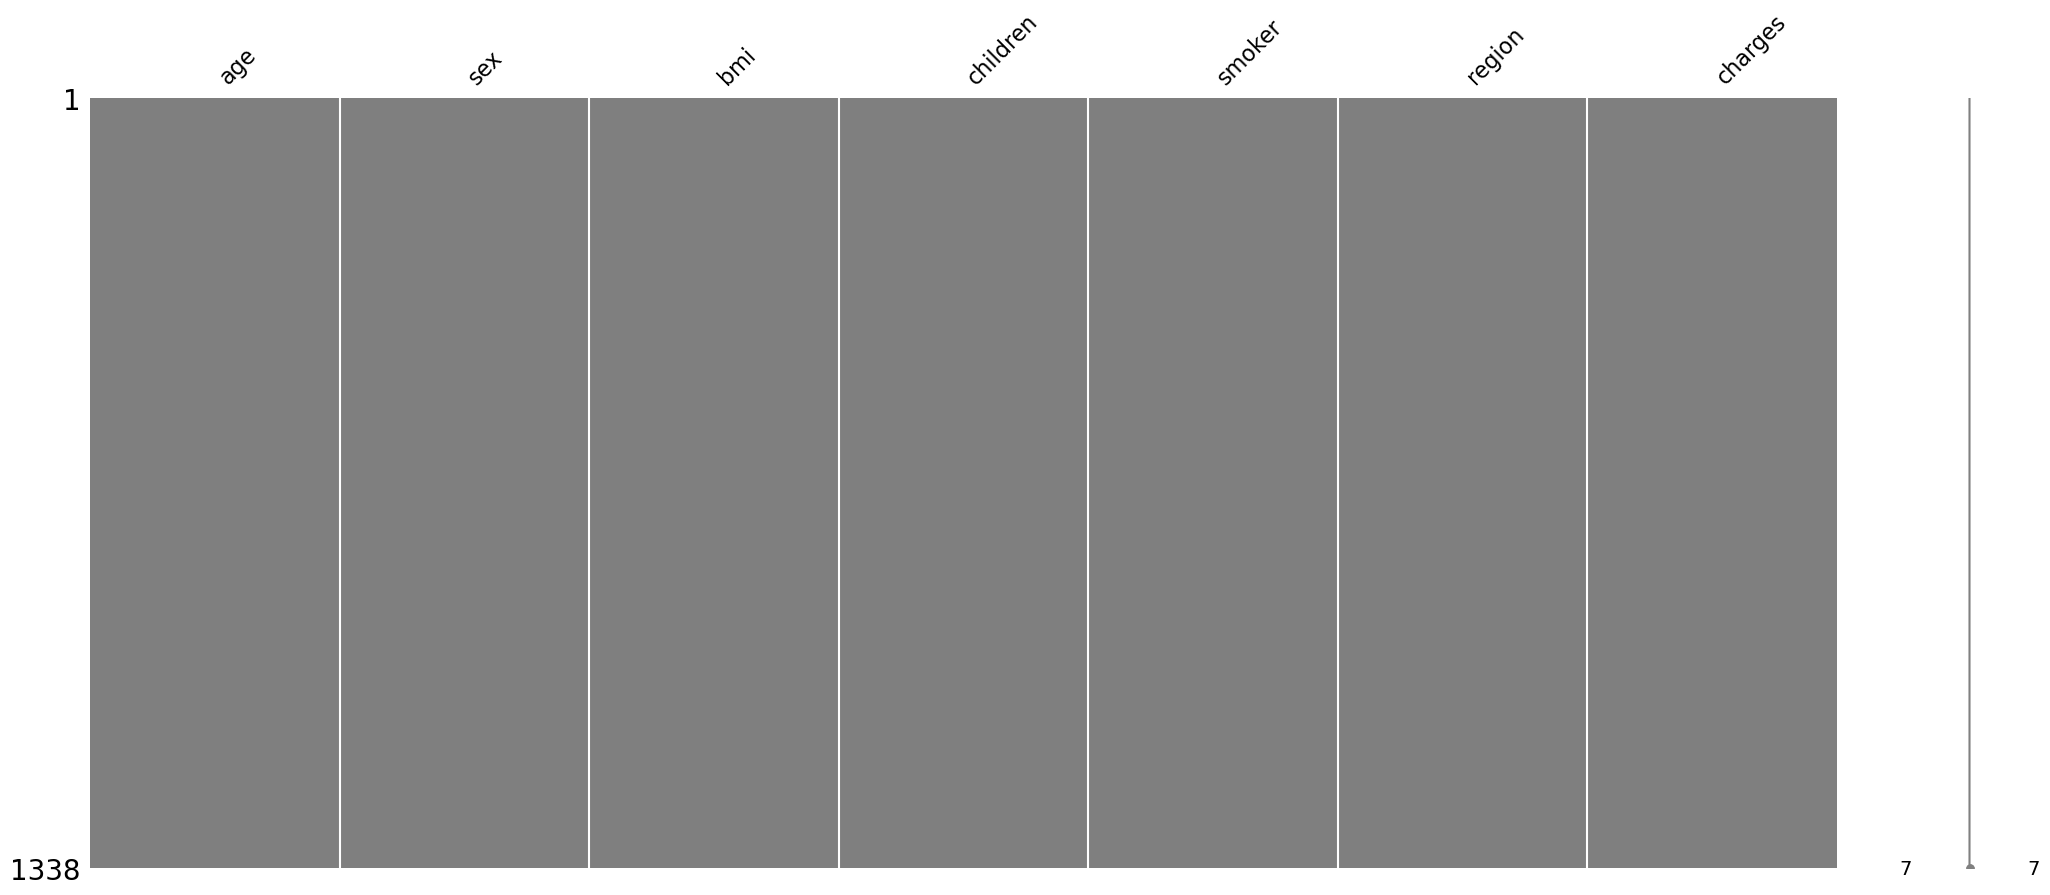

In [9]:
# To visualize the missing values.
msno.matrix(ins_data, color = [0.5,0.5,0.5])
# msno.bar(ins_data)

As there are no shades observed, this confirms that there are no null values.

In [10]:
# To identify unique categories in region.
ins_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
# To identify which region has highest insurers.
ins_data['region'].value_counts().sort_values(ascending = True)

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

Southeast Region has the most no. of insurers.

<Axes: >

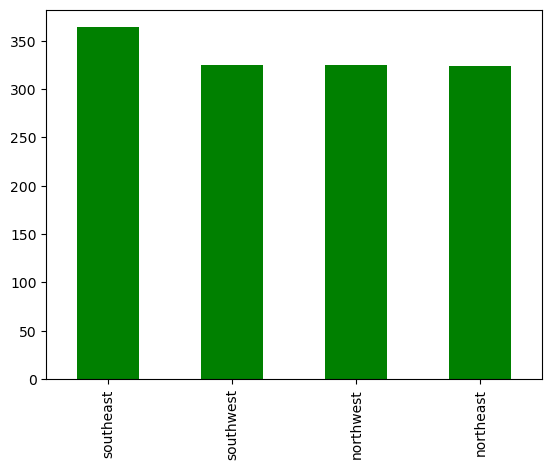

In [12]:
# To visualize the region categories in a bar chart.
ins_data['region'].value_counts().plot(kind = 'bar', color = 'green')

Southeast region has highest no. of people who has applied for insurance.

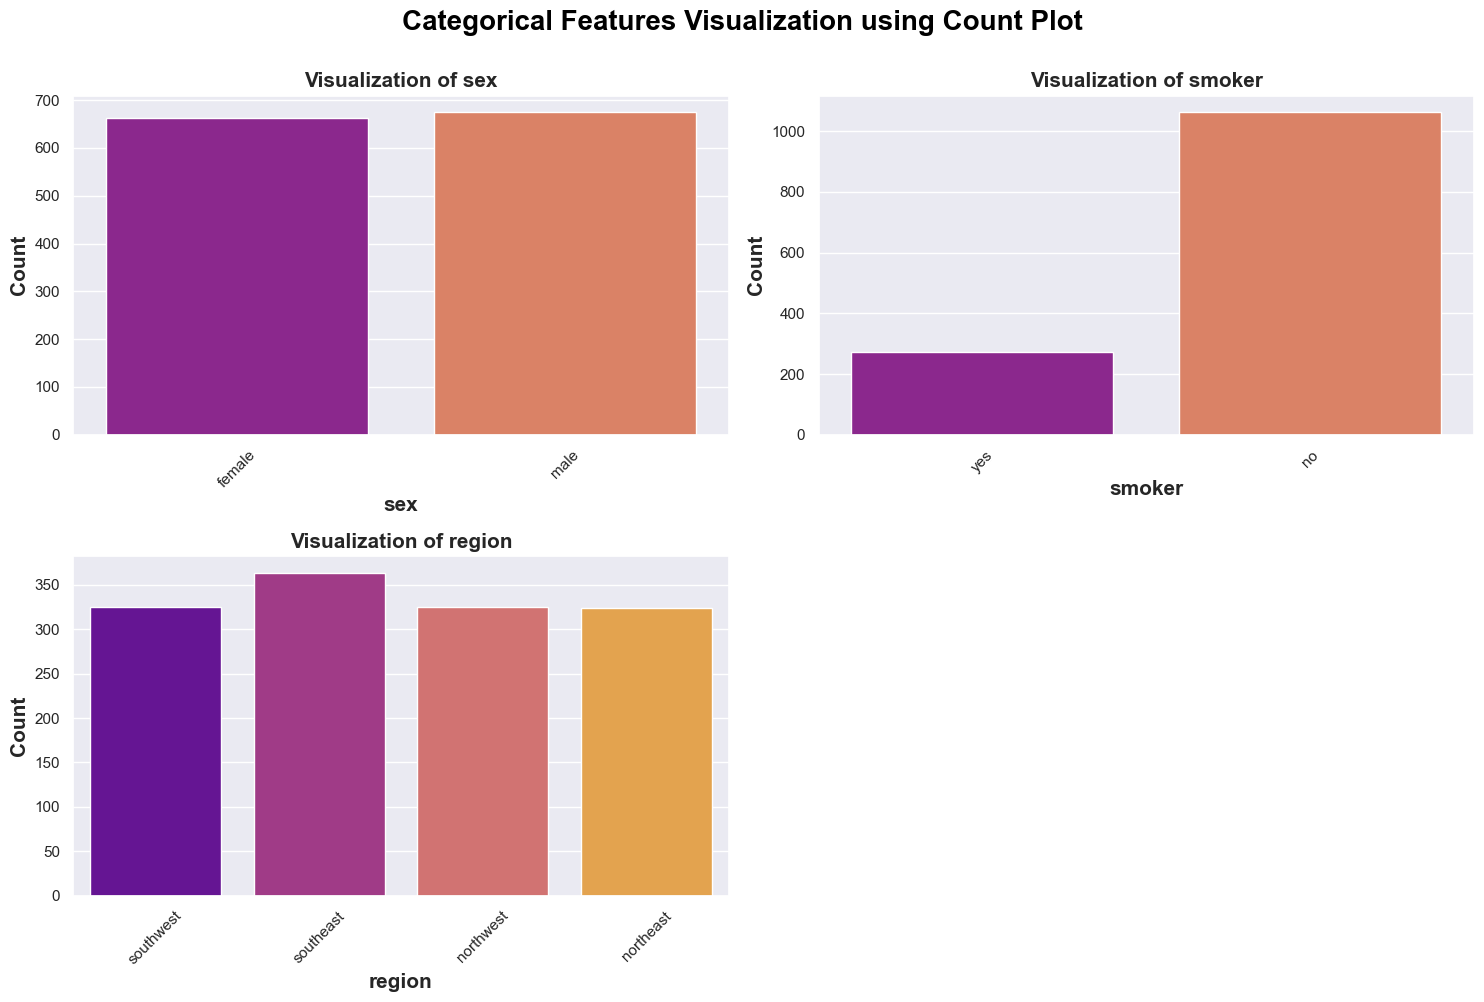

In [13]:
# To visualize categorical features using countplot.

cat_cols = [feature for feature in ins_data.columns if ins_data[feature].dtype == 'object']
cat_cols

plt.figure(figsize = (15,10))
plt.suptitle('Categorical Features Visualization using Count Plot', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale = 1)

for idx,col in enumerate(cat_cols):
    plt.subplot(2,2,idx+1)
    sns.countplot(x = ins_data[col], palette = 'plasma')
    plt.title(f'Visualization of {col}', fontsize = 15, fontweight = 'bold')
    plt.xlabel(col, fontsize = 15, fontweight = 'bold')
    plt.ylabel('Count', fontsize = 15, fontweight = 'bold')
    plt.xticks(rotation = 45)

plt.tight_layout()

1. Male has insured more when compared to female insurers.
2. Most of the insurers who have applied for insurance are non-smokers.
3. Southeast region tops the highest no. of insurance applications.

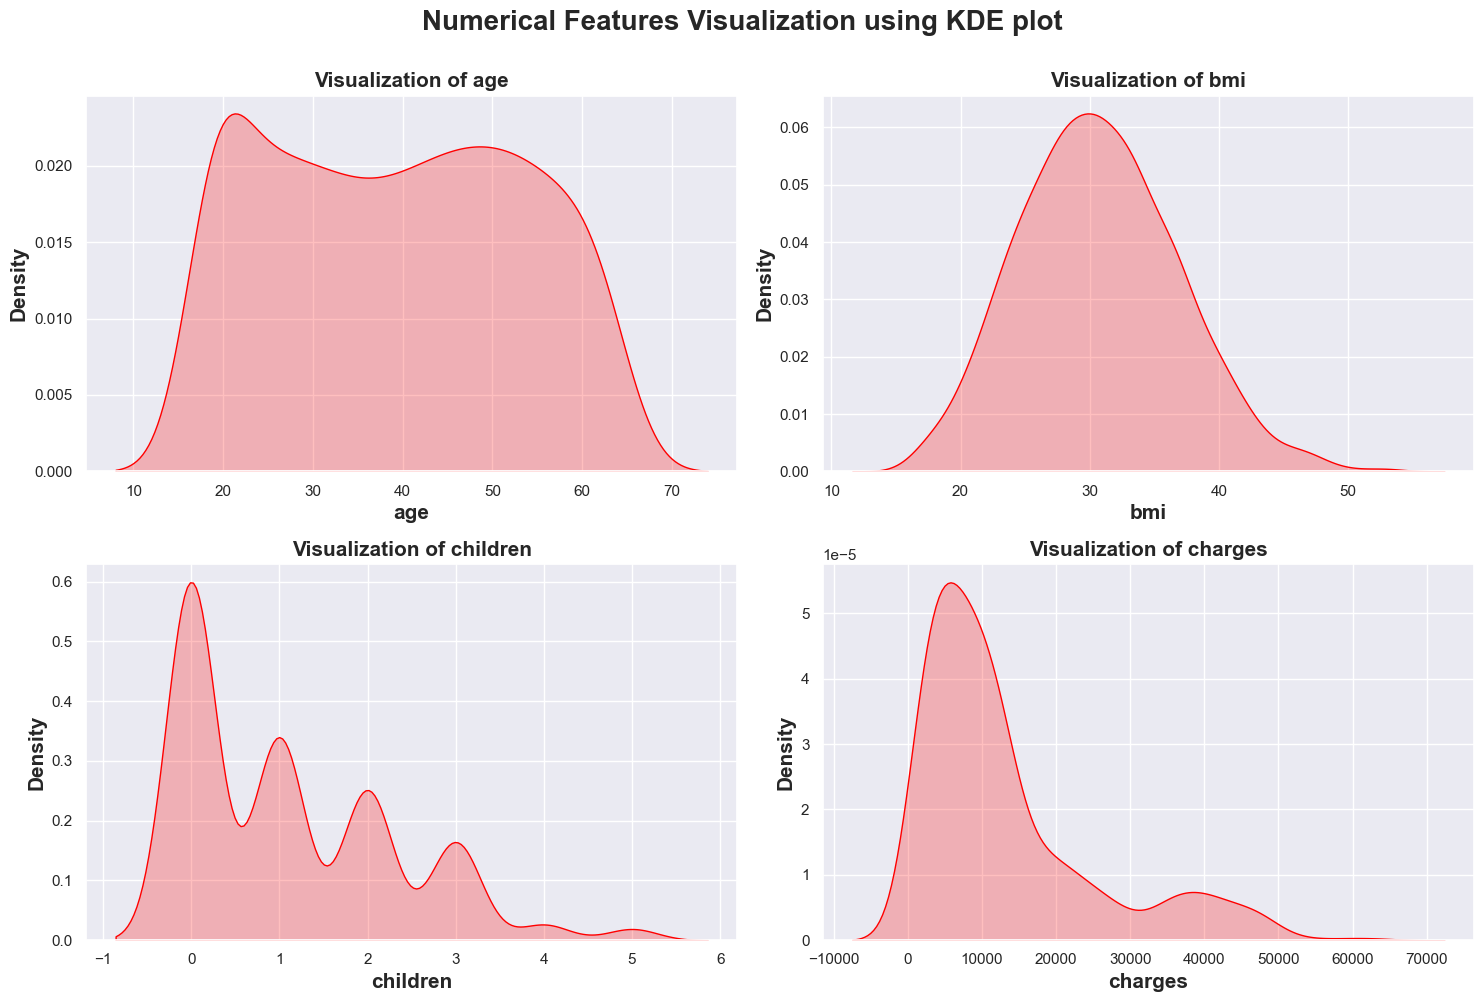

In [14]:
# To visualize numerical features using kde plot.

num_cols = [feature for feature in ins_data.columns if ins_data[feature].dtype != 'object']
num_cols

plt.figure(figsize = (15,10))
plt.suptitle('Numerical Features Visualization using KDE plot', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale = 1)

for idx, col in enumerate(num_cols):
    plt.subplot(2,2,idx+1)
    sns.kdeplot(x = ins_data[col], shade = True, color = 'red')
    plt.title(f'Visualization of {col}', fontsize = 15, fontweight = 'bold')
    plt.xlabel(col, fontsize = 15, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 15, fontweight = 'bold')

plt.tight_layout()

1. age - almost forms a uniform distribution which denotes that ages are uniformly distributed across all data points.
2. bmi - follows a normal distribution where most of the data points are at the age of 30.
3. children - this is a multimodal KDE where the dataset has maximum no. of people who don't have children.
4. charges- follows normal distrubution but most of the datapoints in the dataset are with charges = 1000.

Text(0, 0.5, 'Charges to be Paid')

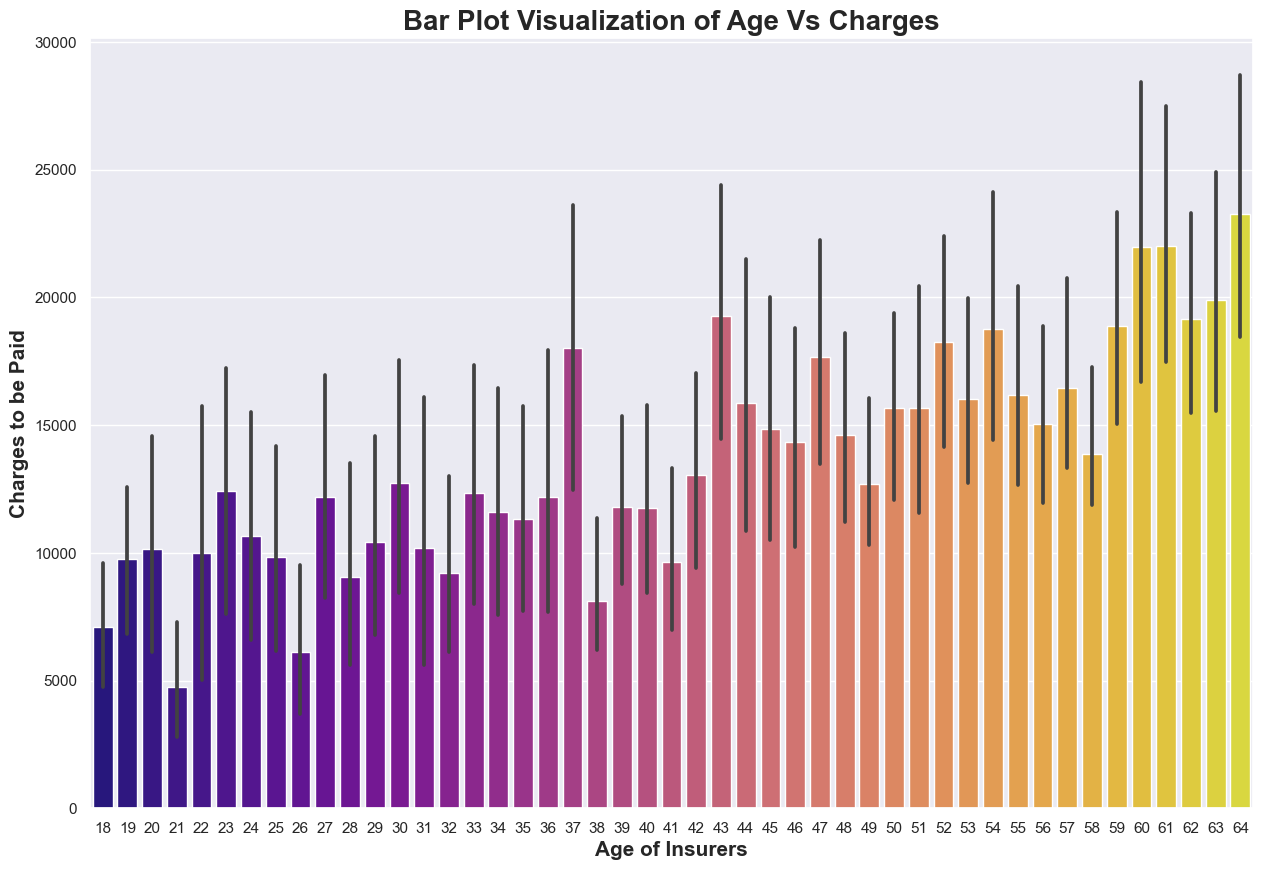

In [15]:
# Let's compare Age & Charge using bar plot.

plt.figure(figsize = (15,10))
sns.barplot(x = 'age', y = 'charges', data = ins_data, palette = 'plasma')
plt.title('Bar Plot Visualization of Age Vs Charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age of Insurers', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be Paid', fontsize = 15, fontweight = 'bold')

1. As expected, when the age is increasing the premium charges is also increasing.
2. So age & charges are positively correlated.
3. The person who is of age 64 is paying the highest premium charges when compared to others.

Text(0, 0.5, 'Charges to be paid')

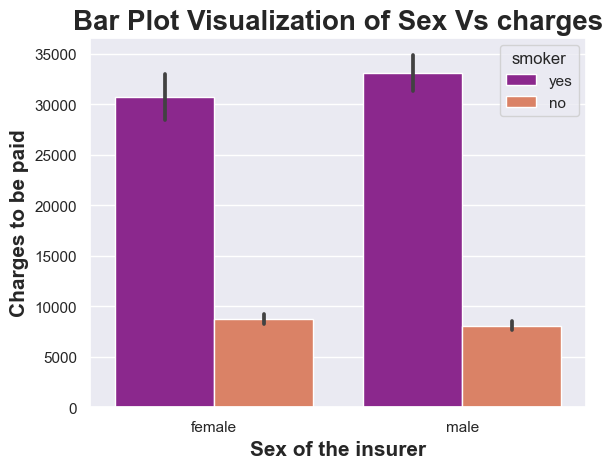

In [16]:
# Let's compare the smokers based on sex Vs charges to see how they are related.

sns.barplot(x = 'sex', y = 'charges', data = ins_data, palette = 'plasma', hue = 'smoker')
plt.title('Bar Plot Visualization of Sex Vs charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('Sex of the insurer', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be paid', fontsize = 15, fontweight = 'bold')

As expected, the people who often smoke (both male & female) are subjected to pay high amount of premium charges.

Text(0, 0.5, 'Charges to be Paid')

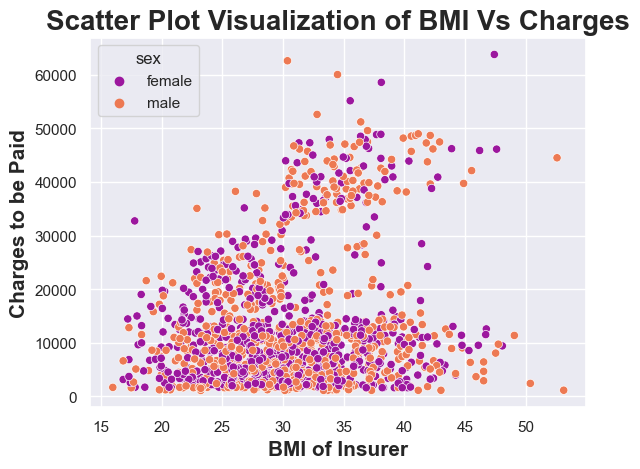

In [17]:
# Let's compare bmi(based on sex) Vs charges using scatter plot.

sns.scatterplot(x = 'bmi', y = 'charges', data = ins_data, palette = 'plasma', hue = 'sex')
plt.title('Scatter Plot Visualization of BMI Vs Charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('BMI of Insurer', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be Paid', fontsize = 15, fontweight = 'bold')

Higher the BMI, higher is the charges to be paid.

Text(0, 0.5, 'Charges to be paid')

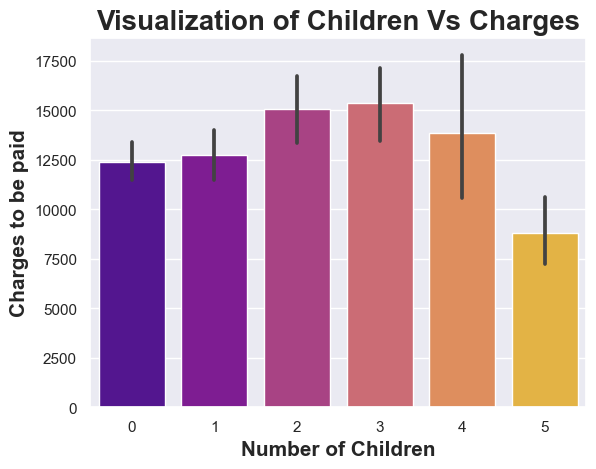

In [18]:
# Let's see how no. of childrens will affect the premium charges.

sns.barplot(x = 'children', y = 'charges', data = ins_data, palette = 'plasma')
plt.title('Visualization of Children Vs Charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Children', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be paid', fontsize = 15, fontweight = 'bold')

The bar plot is uniformly distributed which denotes that no. of children will have least impact on premium charges.

Text(0, 0.5, 'Charges to be paid')

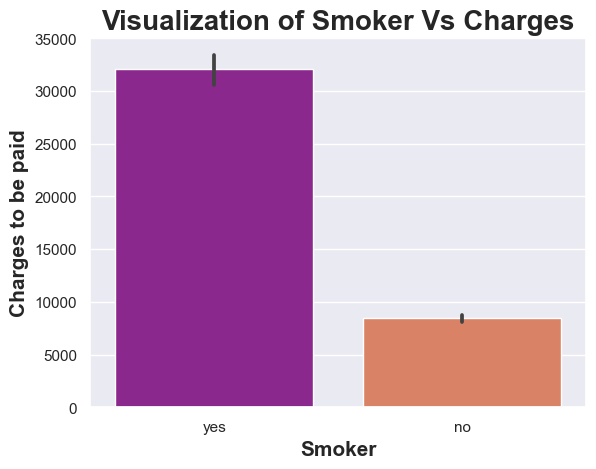

In [19]:
# Let's visualize how smoker is related to charges.

sns.barplot(x = 'smoker', y = 'charges', data = ins_data, palette = 'plasma')
plt.title('Visualization of Smoker Vs Charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('Smoker', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be paid', fontsize = 15, fontweight = 'bold')

1. As expected, people who smoke needs to pay high premium charges. So, AVOID SMOKING!!.
2. Smoker feature is highly correlated to premium charges.

Text(0, 0.5, 'Charges to be Paid')

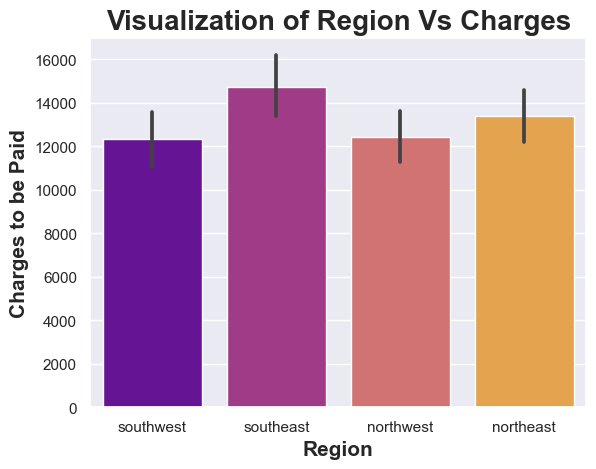

In [20]:
# Let's visualize how region will impact premium charges.

sns.barplot(x = 'region', y = 'charges', data = ins_data, palette = 'plasma')
plt.title('Visualization of Region Vs Charges', fontsize = 20, fontweight = 'bold')
plt.xlabel('Region', fontsize = 15, fontweight = 'bold')
plt.ylabel('Charges to be Paid', fontsize = 15, fontweight = 'bold')

Each Region is uniformly distributed which denotes that region feature has least impact on premium charges.

In [21]:
# To visualize numerical features for the presence of outliers.

num_cols

for col in num_cols:
    fig = px.box(x = col, data_frame = ins_data)
    fig.show()

Only BMI seems to be having some extreme values but they cannot be considered as outliers as there is a possibility that people will have high BMI and eventually they'll pay high premium charges.

In [22]:
# Let's split the dataset into independent & dependent features.

X = ins_data.iloc[:,:-1]
y = ins_data['charges']

In [23]:
X.head()

age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [25]:
# Perform train test split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [26]:
print(f'Shape of X-train : {X_train.shape}')
print(f'Shape of y-train : {y_train.shape}')
print(f'Shape of X-test : {X_test.shape}')
print(f'Shape of y-test : {y_test.shape}')

Shape of X-train : (1070, 6)
Shape of y-train : (1070,)
Shape of X-test : (268, 6)
Shape of y-test : (268,)


In [27]:
# Let's one hot encode categorical features like sex, smoker & region.

cat_cols

ohe_encoder = OneHotEncoder(drop = 'first', dtype = 'int', handle_unknown = 'ignore')
ohe_encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', dtype='int', handle_unknown='ignore')

In [28]:
X_train_encoded = ohe_encoder.transform(X_train[cat_cols]).toarray()
X_test_encoded = ohe_encoder.transform(X_test[cat_cols]).toarray()

In [29]:
X_train_encoded

array([[1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [30]:
X_test_encoded

array([[0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0]])

In [31]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns = ohe_encoder.get_feature_names_out(cat_cols), index = X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded,columns = ohe_encoder.get_feature_names_out(cat_cols), index = X_test.index)

In [32]:
X_train_encoded_df.head()

sex_male  smoker_yes  region_northwest  region_southeast  \
737          1           0                 0                 0   
369          1           0                 0                 0   
284          0           0                 0                 0   
1302         0           0                 0                 0   
958          1           1                 0                 0   

      region_southwest  
737                  1  
369                  0  
284                  1  
1302                 1  
958                  0

In [33]:
X_test_encoded_df.head()

sex_male  smoker_yes  region_northwest  region_southeast  \
1099         0           0                 0                 1   
759          1           1                 0                 1   
215          0           0                 0                 0   
903          1           0                 0                 1   
989          0           1                 0                 0   

      region_southwest  
1099                 0  
759                  0  
215                  1  
903                  0  
989                  0

In [34]:
# Let's concat Actual dataframe with encoded dataframe.

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy = pd.concat([X_train,X_train_encoded_df], axis = 1)
X_test_copy = pd.concat([X_test,X_test_encoded_df], axis = 1)

In [35]:
X_train_copy.head()

age     sex    bmi  children smoker     region  sex_male  smoker_yes  \
737    26    male  23.70         2     no  southwest         1           0   
369    18    male  30.40         3     no  northeast         1           0   
284    52  female  31.20         0     no  southwest         0           0   
1302   25  female  20.80         1     no  southwest         0           0   
958    43    male  34.96         1    yes  northeast         1           1   

      region_northwest  region_southeast  region_southwest  
737                  0                 0                 1  
369                  0                 0                 0  
284                  0                 0                 1  
1302                 0                 0                 1  
958                  0                 0                 0

In [36]:
X_test_copy.head()

age     sex    bmi  children smoker     region  sex_male  smoker_yes  \
1099   25  female  33.99         1     no  southeast         0           0   
759    18    male  38.17         0    yes  southeast         1           1   
215    41  female  37.10         2     no  southwest         0           0   
903    49    male  36.85         0     no  southeast         1           0   
989    24  female  20.52         0    yes  northeast         0           1   

      region_northwest  region_southeast  region_southwest  
1099                 0                 1                 0  
759                  0                 1                 0  
215                  0                 0                 1  
903                  0                 1                 0  
989                  0                 0                 0

In [37]:
# Drop the categorical features.

cat_cols

X_train_copy = X_train_copy.drop(cat_cols,axis = 1)
X_test_copy = X_test_copy.drop(cat_cols, axis = 1)

In [38]:
X_train_copy.head()

age    bmi  children  sex_male  smoker_yes  region_northwest  \
737    26  23.70         2         1           0                 0   
369    18  30.40         3         1           0                 0   
284    52  31.20         0         0           0                 0   
1302   25  20.80         1         0           0                 0   
958    43  34.96         1         1           1                 0   

      region_southeast  region_southwest  
737                  0                 1  
369                  0                 0  
284                  0                 1  
1302                 0                 1  
958                  0                 0

In [39]:
X_test_copy.head()

age    bmi  children  sex_male  smoker_yes  region_northwest  \
1099   25  33.99         1         0           0                 0   
759    18  38.17         0         1           1                 0   
215    41  37.10         2         0           0                 0   
903    49  36.85         0         1           0                 0   
989    24  20.52         0         0           1                 0   

      region_southeast  region_southwest  
1099                 1                 0  
759                  1                 0  
215                  0                 1  
903                  1                 0  
989                  0                 0

## To check for multicollinearity

<Axes: >

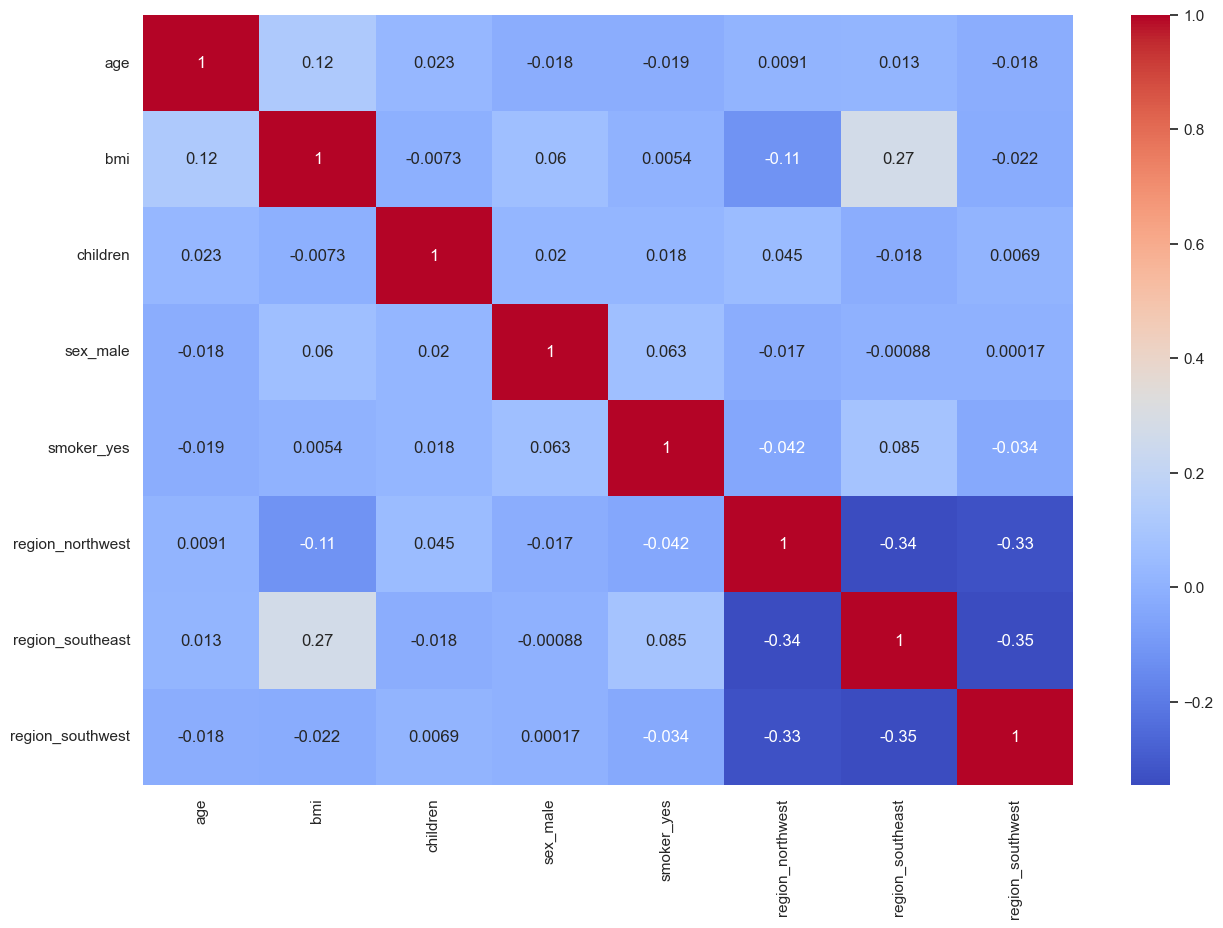

In [40]:
# Let's visualize the correlation of independent features using heatmap.

plt.figure(figsize = (15,10))
sns.heatmap(X_train_copy.corr(), annot = True, cmap = 'coolwarm')

In [41]:
# Let's create a function that can check for multicollinearity between the independent features.

def corr_func(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                corr_col.add(corr_matrix.corr().columns[i])
    return corr_col

In [42]:
# Call the correlation function.

corr_func(X_train_copy,0.85)

set()

The above empty set denotes that there are no features that has the presence of multicollinearity.

In [43]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 737 to 219
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   sex_male          1070 non-null   int32  
 4   smoker_yes        1070 non-null   int32  
 5   region_northwest  1070 non-null   int32  
 6   region_southeast  1070 non-null   int32  
 7   region_southwest  1070 non-null   int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 54.3 KB


In [44]:
# Let's remove the features like sex, children & region as they have least impact on the target variable which is charges.

X_train_copy_corr = X_train_copy.copy()
X_test_copy_corr = X_test_copy.copy()

X_train_copy_corr.drop(columns = ['children','sex_male','region_northwest','region_southeast','region_southwest'], axis = 1, inplace = True)
X_test_copy_corr.drop(columns = ['children','sex_male','region_northwest','region_southeast','region_southwest'], axis = 1, inplace = True)

In [45]:
X_train_copy_corr.head()

age    bmi  smoker_yes
737    26  23.70           0
369    18  30.40           0
284    52  31.20           0
1302   25  20.80           0
958    43  34.96           1

In [46]:
X_test_copy_corr.head()

age    bmi  smoker_yes
1099   25  33.99           0
759    18  38.17           1
215    41  37.10           0
903    49  36.85           0
989    24  20.52           1

In [47]:
# Let's perform Standardization.

scaler = StandardScaler()
scaler.fit(X_train_copy_corr)

StandardScaler()

In [48]:
X_train_copy_corr_scaled = scaler.transform(X_train_copy_corr)
X_test_copy_corr_scaled = scaler.transform(X_test_copy_corr)

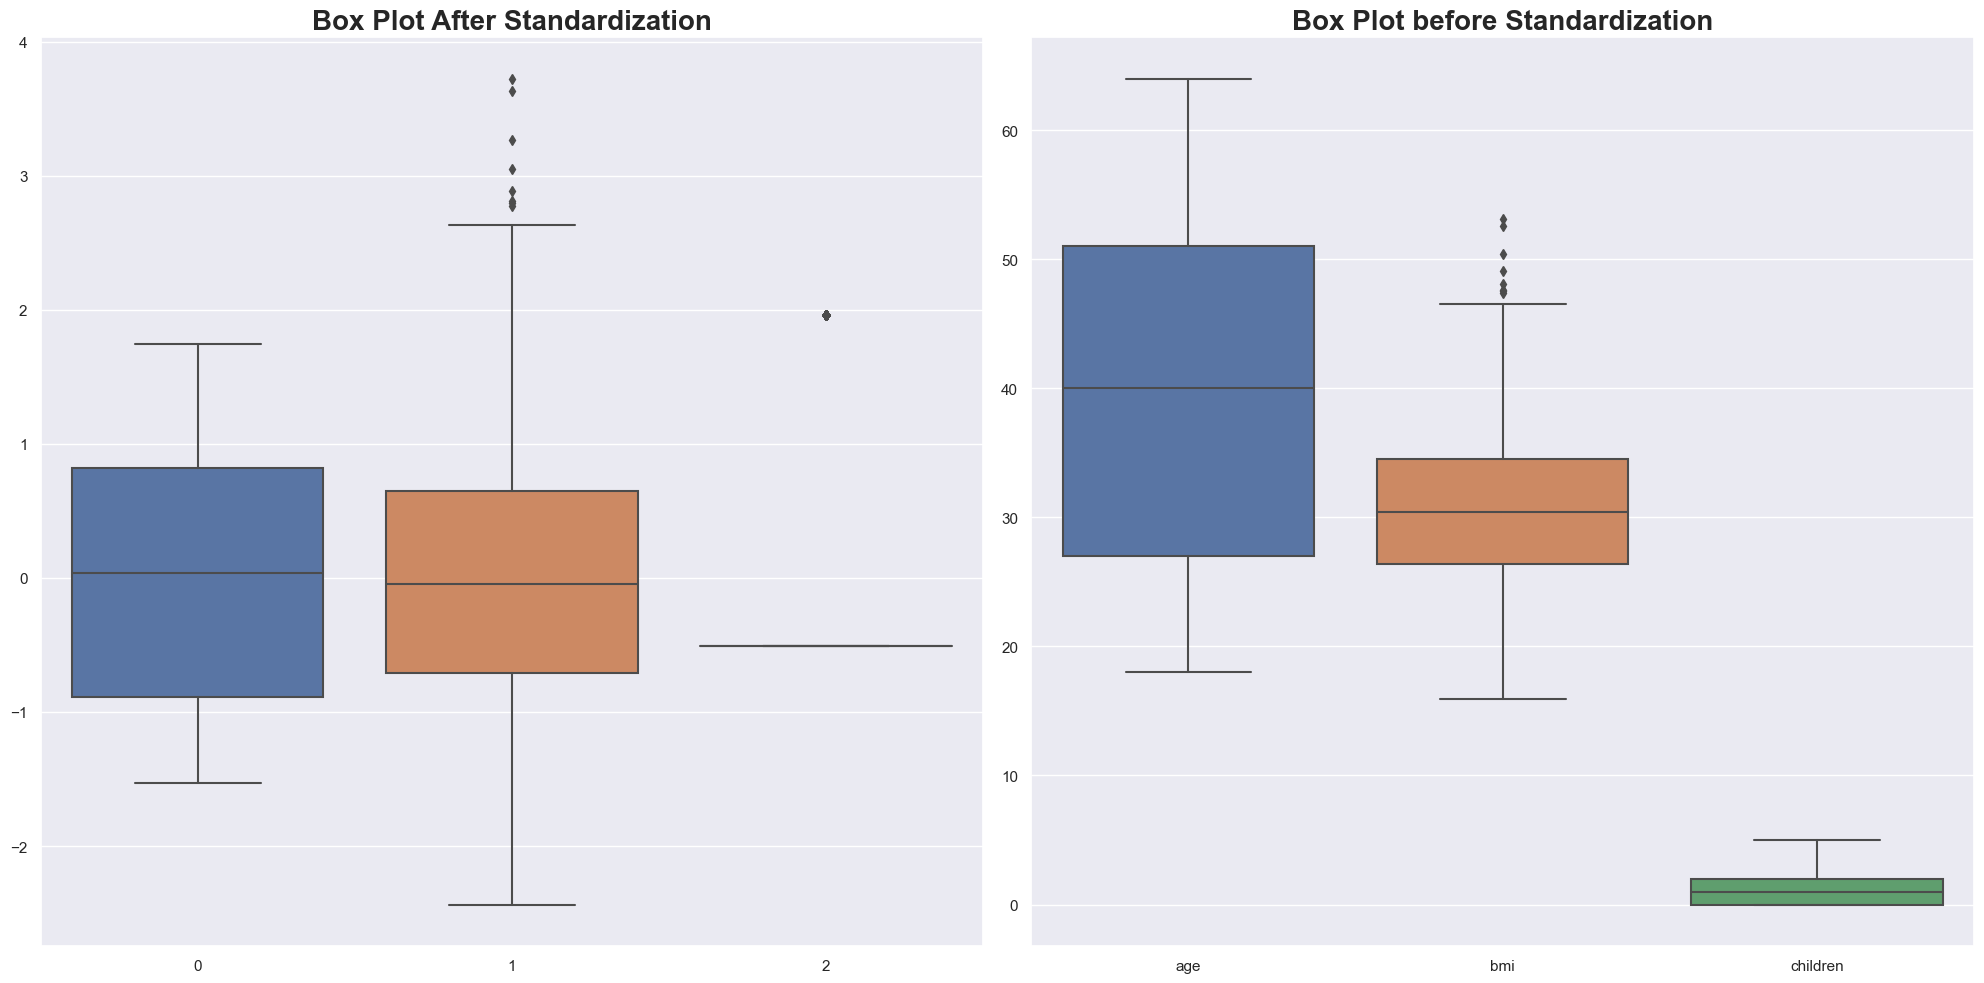

In [49]:
# Let's visualize the box plot after standardizing the data.
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(X_train_copy_corr_scaled)
plt.title('Box Plot After Standardization', fontsize = 20, fontweight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(X_train)
plt.title('Box Plot before Standardization', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

As we can see the values are scaled down after standardization.

## Model Training Using Linear Regression.

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_copy_corr_scaled,y_train)

LinearRegression()

In [51]:
lin_pred = lin_reg.predict(X_test_copy_corr_scaled)

In [52]:
# Compare Actual & Predicted Charges.

lin_compare_df = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value (Linear)' : lin_pred
})

lin_compare_df.head()

Actual Value  Predicted Value (Linear)
1099     3227.1211               5770.322522
759     36307.7983              29060.719703
215      7371.7720              10852.641532
903      8125.7845              12827.203463
989     14571.8908              25060.084287

In [53]:
# To fetch the coefficients.
lin_reg.coef_

array([3604.70816877, 1893.26893426, 9608.41589505])

## array([3604.70816877, 1893.26893426, 9608.41589505]) --> [Age, BMI, Smoker]

1. For a unit increase in age, there will be 3604 Rs. increase in premium charges.
2. For a unit increase in BMI, there will be 1893 Rs. increase in premium charges.
3. For a unit increase in Smoker, there will be 9608 Rs. increase in premium charges.

In [54]:
# To fetch the intercept.
lin_reg.intercept_

13319.694857326165

## Linearity Check.

Text(0, 0.5, 'Predicted Values')

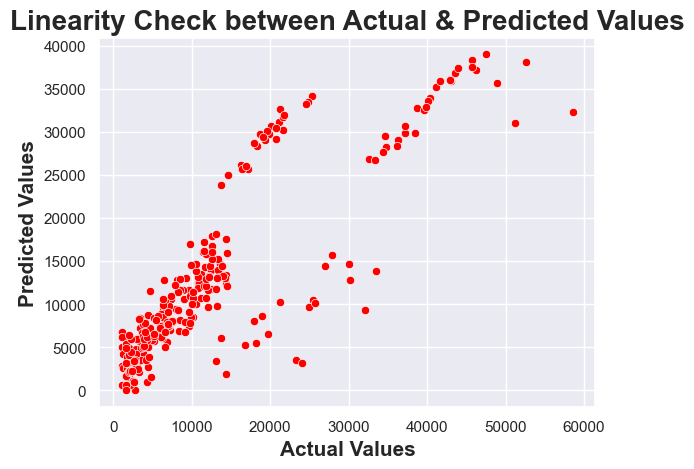

In [55]:
sns.scatterplot(x = y_test, y = lin_pred, color = 'red' )
plt.title('Linearity Check between Actual & Predicted Values', fontsize = 20, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 15, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 15, fontweight = 'bold')

Looks like most of the data are linearly related between Actual & Predicted Values.

In [56]:
# To evaluate the performance of the model.

# Calculate score.
lin_score_train = lin_reg.score(X_train_copy_corr_scaled,y_train)
lin_score_test = lin_reg.score(X_test_copy_corr_scaled,y_test)

print(f'Score of Training Data : {lin_score_train}')
print(f'Score of Testing Data : {lin_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
lin_r2score_train = r2_score(y_train, lin_reg.predict(X_train_copy_corr_scaled))
lin_r2score_test = r2_score(y_test,lin_reg.predict(X_test_copy_corr_scaled))

print(f'R2 Score of Training Data : {lin_r2score_train}')
print(f'R2 Score of Testing Data : {lin_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
lin_adjr2score_train = 1 - (((1 - lin_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy_corr.shape[1] - 1))
lin_adjr2score_test = 1 - (((1 - lin_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy_corr.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {lin_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {lin_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
lin_mse = mean_squared_error(y_test, lin_reg.predict(X_test_copy_corr_scaled))

print(f'Mean Squared Error : {lin_mse}')
print('-------------------------------------------')

# Calculate MAE.
lin_mae = mean_absolute_error(y_test, lin_reg.predict(X_test_copy_corr_scaled))

print(f'Mean Absolute Error : {lin_mae}')
print('-------------------------------------------')

# Calculate RMSE.
lin_rmse = np.sqrt(lin_mse)

print(f'Root Mean Squared Error : {lin_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.7507859374973553
Score of Testing Data : 0.7343046269294253
-------------------------------------------
R2 Score of Training Data : 0.7507859374973553
R2 Score of Testing Data : 0.7343046269294253
-------------------------------------------
Adjusted R2 Score of Training Data : 0.7500845846010065
Adjusted R2 Score of Testing Data : 0.7312853613263506
-------------------------------------------
Mean Squared Error : 39720018.42592379
-------------------------------------------
Mean Absolute Error : 4310.75093924538
-------------------------------------------
Root Mean Squared Error : 6302.381964457866
-------------------------------------------


## Ridge Regression Model Training.

In [57]:
# As Ridge, Lasso & ElasticNet automatically eliminates or provide lower importance to the features such as sex, Children 
# & Region, we will consider using X_train_copy which has all these features and see how our Ridge models are working.

In [58]:
# Let's apply standardization for X_train_copy.

scaler_copy = StandardScaler()
scaler_copy.fit(X_train_copy)

StandardScaler()

In [59]:
X_train_copy_scaled = scaler_copy.transform(X_train_copy)
X_test_copy_scaled = scaler_copy.transform(X_test_copy)

In [60]:
# Ridge Regression Model Training.

ridge_reg = Ridge()
ridge_reg.fit(X_train_copy_scaled,y_train)

Ridge()

In [61]:
ridge_pred = ridge_reg.predict(X_test_copy_scaled)

In [62]:
# Compare Actual Vs Predicted.

ridge_compare_df = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : ridge_pred
})

ridge_compare_df.head()

Actual     Predicted
1099   3227.1211   5594.534363
759   36307.7983  28233.011412
215    7371.7720  11199.457375
903    8125.7845  11943.893694
989   14571.8908  24906.582336

In [63]:
# Coefficients & Intercepts.
print(f'Coefficients or Slope : {ridge_reg.coef_}')
print(f'Intercepts : {ridge_reg.intercept_}')

Coefficients or Slope : [3574.94500692 1966.56145228  701.90575137  -54.24668703 9597.85729318
 -209.79983669 -350.88520133 -369.48828898]
Intercepts : 13319.694857326165


The slopes are negative for sex & region which denotes that these are less important features for prediction.

Text(0, 0.5, 'Predicted Value')

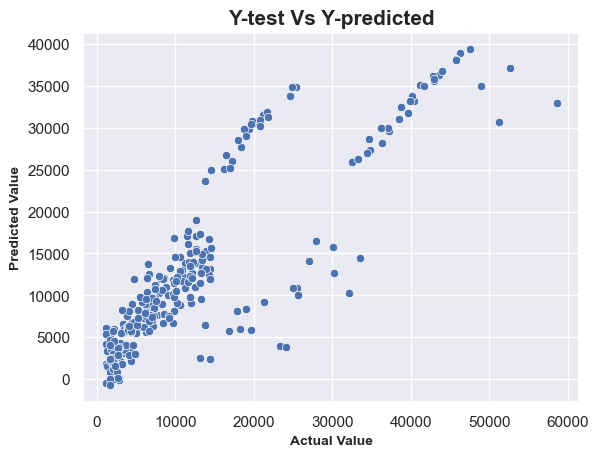

In [64]:
# Linearity Check.
sns.scatterplot(x = y_test, y = ridge_pred, palette = 'plasma')
plt.title('Y-test Vs Y-predicted', fontsize = 15, fontweight = 'bold')
plt.xlabel('Actual Value', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Value', fontsize = 10, fontweight = 'bold')

In [65]:
# To evaluate the performance of the model.

# Calculate score.
ridge_score_train = ridge_reg.score(X_train_copy_scaled,y_train)
ridge_score_test = ridge_reg.score(X_test_copy_scaled,y_test)

print(f'Score of Training Data : {ridge_score_train}')
print(f'Score of Testing Data : {ridge_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
ridge_r2score_train = r2_score(y_train, ridge_reg.predict(X_train_copy_scaled))
ridge_r2score_test = r2_score(y_test,ridge_reg.predict(X_test_copy_scaled))

print(f'R2 Score of Training Data : {ridge_r2score_train}')
print(f'R2 Score of Testing Data : {ridge_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
ridge_adjr2score_train = 1 - (((1 - ridge_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy.shape[1] - 1))
ridge_adjr2score_test = 1 - (((1 - ridge_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {ridge_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {ridge_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
ridge_mse = mean_squared_error(y_test, ridge_reg.predict(X_test_copy_scaled))

print(f'Mean Squared Error : {ridge_mse}')
print('-------------------------------------------')

# Calculate MAE.
ridge_mae = mean_absolute_error(y_test, ridge_reg.predict(X_test_copy_scaled))

print(f'Mean Absolute Error : {ridge_mae}')
print('-------------------------------------------')

# Calculate RMSE.
ridge_rmse = np.sqrt(ridge_mse)

print(f'Root Mean Squared Error : {ridge_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.7548618917506463
Score of Testing Data : 0.7341522217401262
-------------------------------------------
R2 Score of Training Data : 0.7548618917506463
R2 Score of Testing Data : 0.7341522217401262
-------------------------------------------
Adjusted R2 Score of Training Data : 0.7530135365517823
Adjusted R2 Score of Testing Data : 0.7259407073537208
-------------------------------------------
Mean Squared Error : 39742802.17581455
-------------------------------------------
Mean Absolute Error : 4359.459573354676
-------------------------------------------
Root Mean Squared Error : 6304.189256027657
-------------------------------------------


In [66]:
# To fetch the lambda value.
ridge_reg.alpha

1.0

This is the highest value of lambda that ridge regression has.

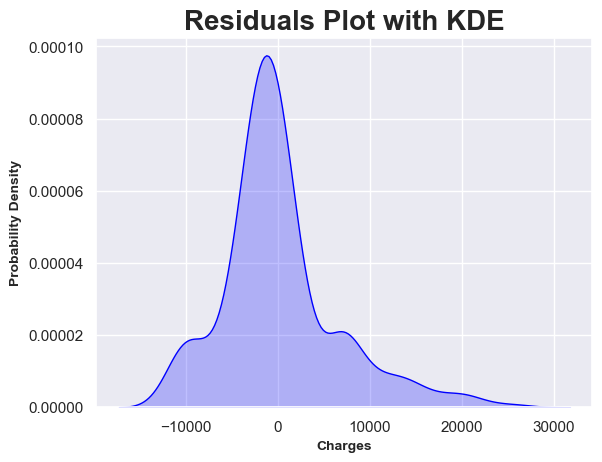

In [67]:
# To visualize the distribution of residuals.

ridge_residuals = y_test - ridge_pred

sns.kdeplot(ridge_residuals,shade = True, color = 'blue')
plt.title('Residuals Plot with KDE', fontsize = 20, fontweight = 'bold')
plt.xlabel('Charges', fontsize = 10, fontweight = 'bold')
plt.ylabel('Probability Density', fontsize = 10, fontweight = 'bold')
plt.show()

1. The residuals points are much scattered and are not closer to zero.
2. This denotes that the error difference between actual and predicted values are so large.
3. Also, the probability density for zero errors is also very low (close to 0.00010) which denotes that there is a very little probability to obtain errors with 0.

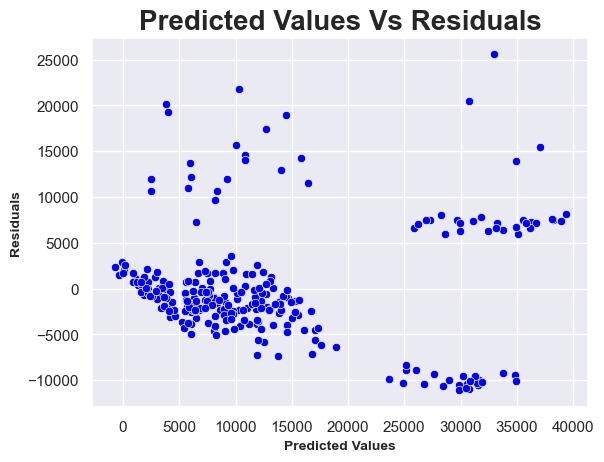

In [68]:
# To visualize the residuals through scatter plot.
sns.scatterplot(x = ridge_pred, y = ridge_residuals, color = 'blue')
plt.title('Predicted Values Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

As most data points are closer to negative values of residuals, we can infer that the model to over predict the values i.e., the model is predicting more than the actual values.

## Lasso Regression Model Training

In [69]:
lasso_reg = Lasso()
lasso_reg.fit(X_train_copy_scaled, y_train)

Lasso()

In [70]:
lasso_pred = lasso_reg.predict(X_test_copy_scaled)

In [71]:
# Compare Actual Vs Predicted.

lasso_reg_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Lasso)' : lasso_pred
})

lasso_reg_compare.head()

Actual Values  Predicted Values (Lasso)
1099      3227.1211               5587.385697
759      36307.7983              28246.403280
215       7371.7720              11196.737134
903       8125.7845              11942.737177
989      14571.8908              24915.430488

In [72]:
# Coefficients & Intercept.

print(f'Coefficient or Slope : {lasso_reg.coef_}')
print(f'Intercept : {lasso_reg.intercept_}')

Coefficient or Slope : [3577.41385901 1966.94417099  701.25139063  -53.72237145 9605.90516436
 -207.29450849 -349.36752364 -367.1638892 ]
Intercept : 13319.694857326165


The coefficients are negative for sex & region

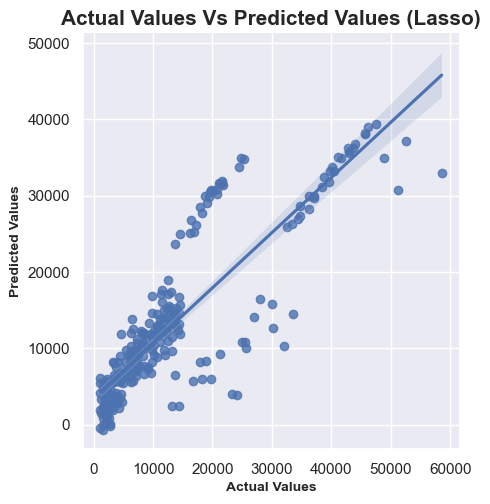

In [73]:
# To check for Linearity.

sns.lmplot(x = 'Actual Values', y = 'Predicted Values (Lasso)', data = lasso_reg_compare)
plt.title('Actual Values Vs Predicted Values (Lasso)', fontsize = 15, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.show()

Few of the data points are not following linear property which denotes that the actual & predicted values are not same for those points.

In [74]:
# To evaluate the performance of the model.

# Calculate score.
lasso_score_train = lasso_reg.score(X_train_copy_scaled,y_train)
lasso_score_test = lasso_reg.score(X_test_copy_scaled,y_test)

print(f'Score of Training Data : {lasso_score_train}')
print(f'Score of Testing Data : {lasso_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
lasso_r2score_train = r2_score(y_train, lasso_reg.predict(X_train_copy_scaled))
lasso_r2score_test = r2_score(y_test,lasso_reg.predict(X_test_copy_scaled))

print(f'R2 Score of Training Data : {lasso_r2score_train}')
print(f'R2 Score of Testing Data : {lasso_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
lasso_adjr2score_train = 1 - (((1 - lasso_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy.shape[1] - 1))
lasso_adjr2score_test = 1 - (((1 - lasso_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {lasso_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {lasso_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
lasso_mse = mean_squared_error(y_test, lasso_reg.predict(X_test_copy_scaled))

print(f'Mean Squared Error : {lasso_mse}')
print('-------------------------------------------')

# Calculate MAE.
lasso_mae = mean_absolute_error(y_test, lasso_reg.predict(X_test_copy_scaled))

print(f'Mean Absolute Error : {lasso_mae}')
print('-------------------------------------------')

# Calculate RMSE.
lasso_rmse = np.sqrt(lasso_mse)

print(f'Root Mean Squared Error : {lasso_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.7548624555771598
Score of Testing Data : 0.7341780284530364
-------------------------------------------
R2 Score of Training Data : 0.7548624555771598
R2 Score of Testing Data : 0.7341780284530364
-------------------------------------------
Adjusted R2 Score of Training Data : 0.7530141046295795
Adjusted R2 Score of Testing Data : 0.7259673111851765
-------------------------------------------
Mean Squared Error : 39738944.212085396
-------------------------------------------
Mean Absolute Error : 4357.832586660987
-------------------------------------------
Root Mean Squared Error : 6303.883264471622
-------------------------------------------


In [75]:
lasso_reg.alpha

1.0

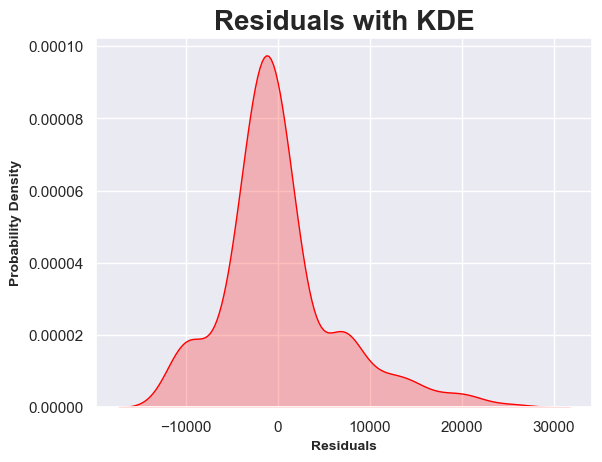

In [76]:
# To visualize the distribution of residuals.

lasso_residuals = y_test - lasso_pred

sns.kdeplot(lasso_residuals, shade = True, color = 'red')
plt.title('Residuals with KDE', fontsize = 20, fontweight = 'bold')
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Probability Density', fontsize = 10, fontweight = 'bold')
plt.show()

1. The data points are much scattered and are not closer to zero there by denoting that there is difference between actual & Predicted values.
2. Also, the probability density for residuals of 0 is close to 0.00010.

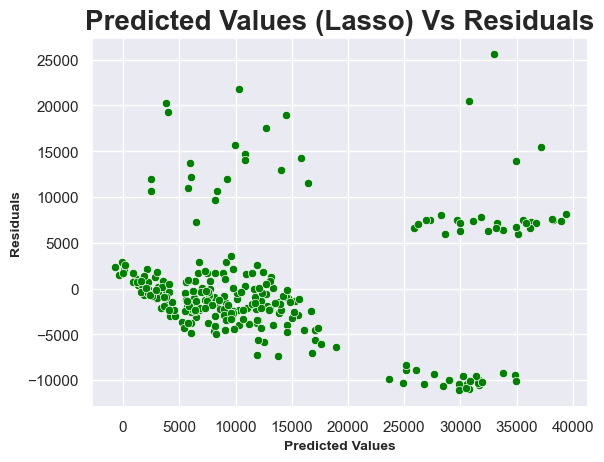

In [77]:
# To visualize how well the model has performed.

sns.scatterplot(x = lasso_pred, y = lasso_residuals, color = 'green')
plt.title('Predicted Values (Lasso) Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

The points below zero in residuals indicate that the model has predicted more than the actual value (over-prediction) and the points above zero indicates that the model has predicted less than the actual value (under-prediction)

In [78]:
# As the actual & predicted values follow some non-linearity in all three models, let's try to apply Polynomial regression 
# and evaluate the model performance.

## Linear Regression Model Training with Polynomial Features

In [79]:
# X_train_copy_corr_scaled, X_test_copy_corr_scaled

lin_poly = PolynomialFeatures(degree = 2, include_bias = True)
lin_poly.fit(X_train_copy_corr_scaled)

PolynomialFeatures()

In [80]:
# Before apply Polynomial Regression.
X_train_copy_corr_scaled[0]

array([-0.95737864, -1.15329418, -0.50874702])

In [81]:
X_train_copy_corr_scaled_poly = lin_poly.transform(X_train_copy_corr_scaled)
X_test_copy_corr_scaled_poly = lin_poly.transform(X_test_copy_corr_scaled)

In [82]:
# After applying Polynomial Regression - 1 + X1 + X2 + X3 + X1X2 + X2X3 + X1X3 + X1^2 + X2^2 + X3^2
# Formula - (n+d)! / n! * d! where n - no. of independent features; d - degree.
X_train_copy_corr_scaled_poly[0]

array([ 1.        , -0.95737864, -1.15329418, -0.50874702,  0.91657387,
        1.10413922,  0.48706353,  1.33008747,  0.58673498,  0.25882353])

In [83]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_copy_corr_scaled_poly,y_train)

LinearRegression()

In [84]:
lin_pred_poly = lin_reg_poly.predict(X_test_copy_corr_scaled_poly)

In [85]:
# Compare Actual Vs Predicted.

lin_reg_poly_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Linear Poly)' : lin_pred_poly
})

lin_reg_poly_compare.head()

Actual Values  Predicted Values (Linear Poly)
1099      3227.1211                        4804.500
759      36307.7983                       37228.625
215       7371.7720                        8449.250
903       8125.7845                       10888.625
989      14571.8908                       13659.625

In [86]:
# Coefficients & Intercepts.
print(f'Coefficients or Slope : {lin_reg_poly.coef_}')
print(f'Intercepts : {lin_reg_poly.intercept_}')

Coefficients or Slope : [ 0.00000000e+00  3.63993820e+03  1.83349970e+03 -1.29305556e+15
  4.19770946e+02  2.52298369e+02 -1.52270187e+01 -3.44250532e+02
  3.43914545e+03  8.87559424e+14]
Intercepts : -887559423810423.4


Slope is zero for bias as it is a constant term.

In [87]:
# To evaluate the performance of the model.
lin_poly_score_train = lin_reg_poly.score(X_train_copy_corr_scaled_poly,y_train)
lin_poly_score_test = lin_reg_poly.score(X_test_copy_corr_scaled_poly,y_test)

print(f'Score of Training Data : {lin_poly_score_train}')
print(f'Score of Testing Data : {lin_poly_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
lin_reg_poly_r2score_train = r2_score(y_train, lin_reg_poly.predict(X_train_copy_corr_scaled_poly))
lin_reg_poly_r2score_test = r2_score(y_test,lin_reg_poly.predict(X_test_copy_corr_scaled_poly))

print(f'R2 Score of Training Data : {lin_reg_poly_r2score_train}')
print(f'R2 Score of Testing Data : {lin_reg_poly_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
lin_reg_poly_adjr2score_train = 1 - (((1 - lin_reg_poly_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy_corr.shape[1] - 1))
lin_reg_poly_adjr2score_test = 1 - (((1 - lin_reg_poly_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy_corr.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {lin_reg_poly_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {lin_reg_poly_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
lin_reg_poly_mse = mean_squared_error(y_test, lin_reg_poly.predict(X_test_copy_corr_scaled_poly))

print(f'Mean Squared Error : {lin_reg_poly_mse}')
print('-------------------------------------------')

# Calculate MAE.
lin_reg_poly_mae = mean_absolute_error(y_test, lin_reg_poly.predict(X_test_copy_corr_scaled_poly))

print(f'Mean Absolute Error : {lin_reg_poly_mae}')
print('-------------------------------------------')

# Calculate RMSE.
lin_reg_poly_rmse = np.sqrt(lin_reg_poly_mse)

print(f'Root Mean Squared Error : {lin_reg_poly_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.8385038176365422
Score of Testing Data : 0.8394746064634057
-------------------------------------------
R2 Score of Training Data : 0.8385038176365422
R2 Score of Testing Data : 0.8394746064634057
-------------------------------------------
Adjusted R2 Score of Training Data : 0.838049325566101
Adjusted R2 Score of Testing Data : 0.8376504542641262
-------------------------------------------
Mean Squared Error : 23997676.419485733
-------------------------------------------
Mean Absolute Error : 2901.7853183582088
-------------------------------------------
Root Mean Squared Error : 4898.7423303829455
-------------------------------------------


Accuracy has been increased whereas error has been drastically reduced which is good sign.

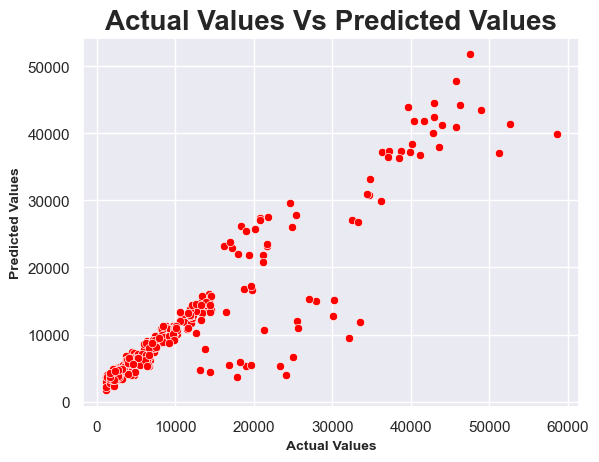

In [88]:
# To check for Linearity.

sns.scatterplot(x = y_test, y = lin_pred_poly, color = 'red')
plt.title('Actual Values Vs Predicted Values', fontsize = 20, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.show()

Wonderful! When compared to actual linear regression model, the linear regression model with Polynomial Features is performing well as it shows linearity between Actual & Predicted Values.

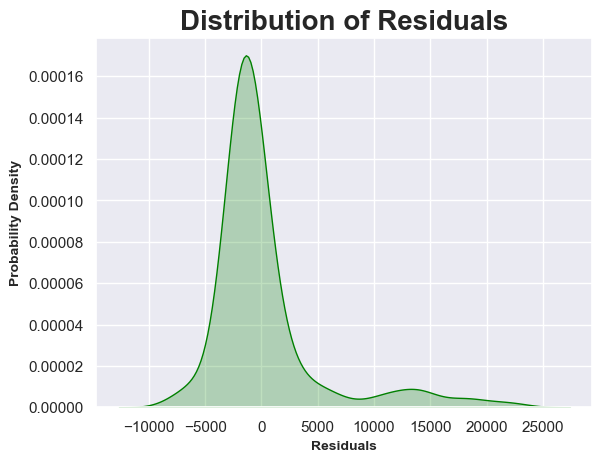

In [89]:
# To visualize the distribution of residuals.

lin_poly_residuals = y_test - lin_pred_poly

sns.kdeplot(lin_poly_residuals, shade = True, color = 'green')
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Probability Density', fontsize = 10, fontweight = 'bold')
plt.show()

The datapoints are still scattered. However, the residuals has become much lower when compared to other models that were not using Polynomial Features.

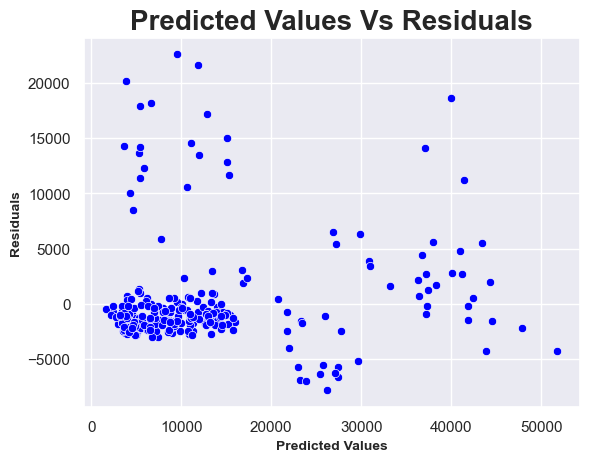

In [90]:
# To visualize the predicted value Vs residuals.

sns.scatterplot(x = lin_pred_poly, y = lin_poly_residuals, color = 'blue')
plt.title('Predicted Values Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

The over-prediction values are drastically reduced i.e., residuals with negative values are reduced.

## Ridge Regression Model Training with Polynomial Features.

In [91]:
regular_poly = PolynomialFeatures(degree = 2, include_bias = True)
regular_poly.fit(X_train_copy_scaled)

PolynomialFeatures()

In [92]:
X_train_copy_scaled[0]

array([-0.95737864, -1.15329418,  0.74818567,  0.97781609, -0.50874702,
       -0.56943606, -0.60398338,  1.74729228])

In [93]:
# X_train_copy_scaled,X_test_copy_scaled
# (8+2)!/8!*2! = 45 features.
X_train_copy_scaled_poly = regular_poly.transform(X_train_copy_scaled)
X_test_copy_scaled_poly = regular_poly.transform(X_test_copy_scaled)

In [94]:
X_train_copy_scaled_poly[0]

array([ 1.        , -0.95737864, -1.15329418,  0.74818567,  0.97781609,
       -0.50874702, -0.56943606, -0.60398338,  1.74729228,  0.91657387,
        1.10413922, -0.71629698, -0.93614025,  0.48706353,  0.54516592,
        0.57824079, -1.67282031,  1.33008747, -0.86287818, -1.12770961,
        0.58673498,  0.65672729,  0.69657051, -2.01514202,  0.5597818 ,
        0.73158799, -0.38063723, -0.4260439 , -0.45189171,  1.30729904,
        0.95612431, -0.49746102, -0.55680374, -0.59058467,  1.70853051,
        0.25882353,  0.2896989 ,  0.30727474, -0.88892974,  0.32425743,
        0.34392991, -0.99497123,  0.36479592, -1.05533549,  3.0530303 ])

In [95]:
ridge_reg_poly = Ridge()
ridge_reg_poly.fit(X_train_copy_scaled_poly,y_train)

Ridge()

In [96]:
ridge_pred_poly = ridge_reg_poly.predict(X_test_copy_scaled_poly)

In [97]:
# Compare Actual Vs Predicted.

ridge_reg_compare_poly = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Ridge Poly)' : ridge_pred_poly
})

ridge_reg_compare_poly.head()

Actual Values  Predicted Values (Ridge Poly)
1099      3227.1211                    4676.920463
759      36307.7983                   35833.760893
215       7371.7720                    8475.722540
903       8125.7845                   10137.278830
989      14571.8908                   13190.746189

In [98]:
# Coefficients & Intercept.

print(f'Coefficients or Slopes : {ridge_reg_poly.coef_}')
print(f'Intercepts : {ridge_reg_poly.intercept_}')

Coefficients or Slopes : [   0.         3575.30423848 1891.9711515   875.91532644 -251.99455479
 3083.38763463  -71.76066105  -80.57254578 -148.39530189  696.86077806
  135.53627536  -87.43272051  -34.54050632  -36.3806341   109.55330006
  358.41807367  269.12694345 -248.85522089  -24.5284438    13.79692947
 3534.40382575  -69.12633907 -377.49031777 -214.67129196  -73.86859257
 -190.97902308  -65.34660084   49.4695404  -119.51784625 -267.39494426
   11.30727333   78.51262134   22.81189305   78.82264457  -70.37288919
 4492.08403948   16.11716213 -296.81185843  102.98845543  -85.15746944
   89.22315929  125.57127379  -84.73744807  135.74109909 -174.36124197]
Intercepts : 8985.535880634532


In [99]:
# To evaluate the model performance.

# Score Method.
ridge_poly_score_train = ridge_reg_poly.score(X_train_copy_scaled_poly,y_train)
ridge_poly_score_test = ridge_reg_poly.score(X_test_copy_scaled_poly,y_test)
print(f'Score of Training Data : {ridge_poly_score_train}')
print(f'Score of Testing Data : {ridge_poly_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
ridge_poly_r2score_train = r2_score(y_train, ridge_reg_poly.predict(X_train_copy_scaled_poly))
ridge_poly_r2score_test = r2_score(y_test,ridge_reg_poly.predict(X_test_copy_scaled_poly))

print(f'R2 Score of Training Data : {ridge_poly_r2score_train}')
print(f'R2 Score of Testing Data : {ridge_poly_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
ridge_poly_adjr2score_train = 1 - (((1 - ridge_poly_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy.shape[1] - 1))
ridge_poly_adjr2score_test = 1 - (((1 - ridge_poly_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {ridge_poly_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {ridge_poly_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
ridge_poly_mse = mean_squared_error(y_test, ridge_reg_poly.predict(X_test_copy_scaled_poly))

print(f'Mean Squared Error : {ridge_poly_mse}')
print('-------------------------------------------')

# Calculate MAE.
ridge_poly_mae = mean_absolute_error(y_test, ridge_reg_poly.predict(X_test_copy_scaled_poly))

print(f'Mean Absolute Error : {ridge_poly_mae}')
print('-------------------------------------------')

# Calculate RMSE.
ridge_poly_rmse = np.sqrt(ridge_poly_mse)

print(f'Root Mean Squared Error : {ridge_poly_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.8467356514254167
Score of Testing Data : 0.846660872143816
-------------------------------------------
R2 Score of Training Data : 0.8467356514254167
R2 Score of Testing Data : 0.846660872143816
-------------------------------------------
Adjusted R2 Score of Training Data : 0.8455800295700004
Adjusted R2 Score of Testing Data : 0.8419245284262505
-------------------------------------------
Mean Squared Error : 22923368.643852536
-------------------------------------------
Mean Absolute Error : 2875.6418527741075
-------------------------------------------
Root Mean Squared Error : 4787.835486297805
-------------------------------------------


The error has reduced a bit more when compared to Linear Regression with Polynomial Features.

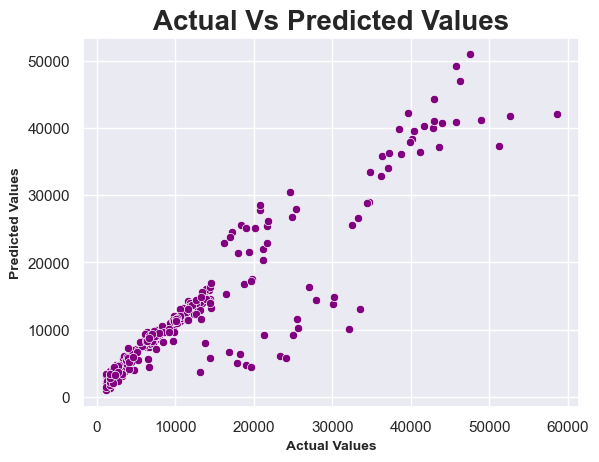

In [100]:
# Check for Linearity.

sns.scatterplot(x = y_test, y = ridge_pred_poly, color = 'purple')
plt.title('Actual Vs Predicted Values', fontsize = 20, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.show()

The data almost follows linearity as like Linear Regression with Polynomial Features.

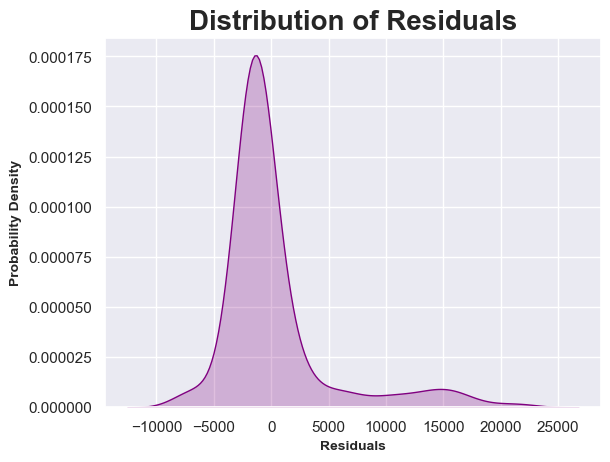

In [101]:
# To visualize the distribution of residuals.

ridge_poly_residuals = y_test - ridge_pred_poly

sns.kdeplot(ridge_poly_residuals, shade = True, color = 'purple')
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Probability Density', fontsize = 10, fontweight = 'bold')
plt.show()

We can observe the probability density of minimum residuals is slowly increasing which denotes that the residuals are slowly moving towards zero.

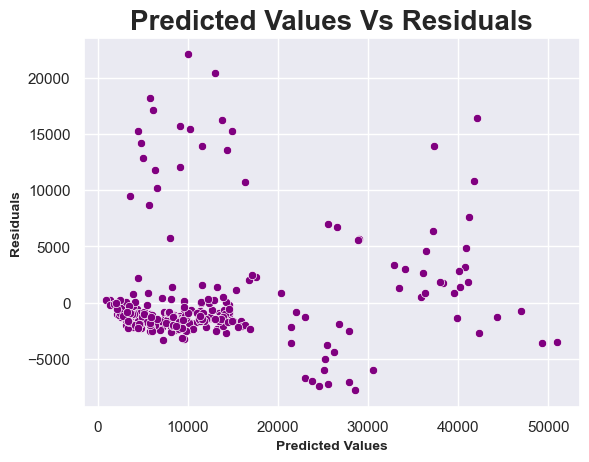

In [102]:
# To visualize the predicted value Vs residuals.

sns.scatterplot(x = ridge_pred_poly, y = ridge_poly_residuals, color = 'purple')
plt.title('Predicted Values Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

Most of the datapoints are close to zero residuals. Also, very few datapoints are under over-prediction.

In [103]:
ridge_reg_poly.alpha

1.0

## Lasso Regression Model Training with Polynomial Features.

In [104]:
lasso_reg_poly = Lasso()
lasso_reg_poly.fit(X_train_copy_scaled_poly,y_train)

Lasso()

In [105]:
lasso_pred_poly = lasso_reg_poly.predict(X_test_copy_scaled_poly)

In [106]:
# Compare Actual Vs Predicted Values.

lasso_reg_poly_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Lasso Poly)' : lasso_pred_poly
})

lasso_reg_poly_compare.head()

Actual Values  Predicted Values (Lasso Poly)
1099      3227.1211                    4674.800271
759      36307.7983                   35832.824519
215       7371.7720                    8476.246192
903       8125.7845                   10135.455054
989      14571.8908                   13190.520904

In [107]:
# Coefficients & Intercept.

print(f'Coefficients or Slopes : {lasso_reg_poly.coef_}')
print(f'Intercept : {lasso_reg_poly.intercept_}')

Coefficients or Slopes : [   0.         3578.58356775 1892.23910833  873.71636511 -251.87355466
 9484.6346438    -0.           -0.         -109.75997218  695.78670612
  135.08637204  -85.36681755  -33.51588555  -35.4687865   106.18814532
  355.31093638  265.99675028 -248.34865945  -23.93080919   12.50840276
 3536.88090569  -64.61006619 -374.55472238 -210.75037614  -72.14856142
 -189.9694694   -64.17259425   49.37686342 -118.29252433 -266.12390841
    0.           77.04375822   21.13149982   77.591632    -70.48481073
   99.82595492   14.28280428 -298.25123029  101.03247785  -92.58748611
   59.94324963  260.24233226  -79.07184624  310.99036448  -49.25130229]
Intercept : 13358.950094146378


In [108]:
# To evaluate the model performance.

# Score Method.
lasso_poly_score_train = lasso_reg_poly.score(X_train_copy_scaled_poly,y_train)
lasso_poly_score_test = lasso_reg_poly.score(X_test_copy_scaled_poly,y_test)
print(f'Score of Training Data : {lasso_poly_score_train}')
print(f'Score of Testing Data : {lasso_poly_score_test}')
print('-------------------------------------------')

# Calculate R2 Score.
lasso_poly_r2score_train = r2_score(y_train, lasso_reg_poly.predict(X_train_copy_scaled_poly))
lasso_poly_r2score_test = r2_score(y_test,lasso_reg_poly.predict(X_test_copy_scaled_poly))

print(f'R2 Score of Training Data : {lasso_poly_r2score_train}')
print(f'R2 Score of Testing Data : {lasso_poly_r2score_test}')
print('-------------------------------------------')

# Calculate Adjusted R2 Score.
lasso_poly_adjr2score_train = 1 - (((1 - lasso_poly_r2score_train) * (len(y_train) - 1)) / (len(y_train) - X_train_copy.shape[1] - 1))
lasso_poly_adjr2score_test = 1 - (((1 - lasso_poly_r2score_test) * (len(y_test) - 1)) / (len(y_test) - X_test_copy.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data : {lasso_poly_adjr2score_train}')
print(f'Adjusted R2 Score of Testing Data : {lasso_poly_adjr2score_test}')
print('-------------------------------------------')

# Calculate Mean Squared Error.
lasso_poly_mse = mean_squared_error(y_test, lasso_reg_poly.predict(X_test_copy_scaled_poly))

print(f'Mean Squared Error : {lasso_poly_mse}')
print('-------------------------------------------')

# Calculate MAE.
lasso_poly_mae = mean_absolute_error(y_test, lasso_reg_poly.predict(X_test_copy_scaled_poly))

print(f'Mean Absolute Error : {lasso_poly_mae}')
print('-------------------------------------------')

# Calculate RMSE.
lasso_poly_rmse = np.sqrt(lasso_poly_mse)

print(f'Root Mean Squared Error : {lasso_poly_rmse}')
print('-------------------------------------------')

Score of Training Data : 0.8467354570631963
Score of Testing Data : 0.8466981192327158
-------------------------------------------
R2 Score of Training Data : 0.8467354570631963
R2 Score of Testing Data : 0.8466981192327158
-------------------------------------------
Adjusted R2 Score of Training Data : 0.845579833742278
Adjusted R2 Score of Testing Data : 0.8419629260043826
-------------------------------------------
Mean Squared Error : 22917800.405910287
-------------------------------------------
Mean Absolute Error : 2873.9875555710382
-------------------------------------------
Root Mean Squared Error : 4787.253952519157
-------------------------------------------


There is a slight drop down in error when compared to Ridge Regression with Polynomial Features.

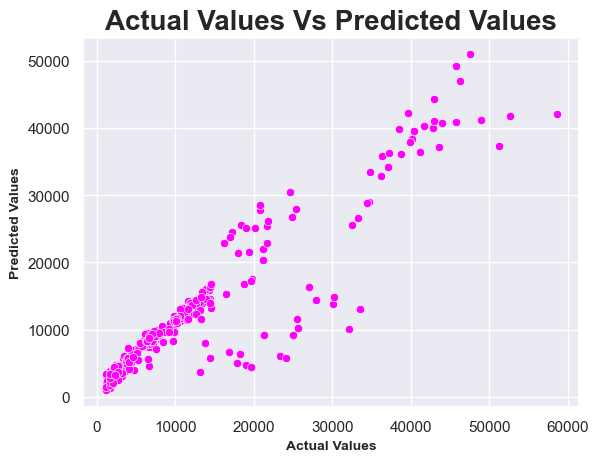

In [109]:
# Check for Linearity

sns.scatterplot(x = y_test, y = lasso_pred_poly, color = 'magenta')
plt.title('Actual Values Vs Predicted Values', fontsize = 20, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.show()

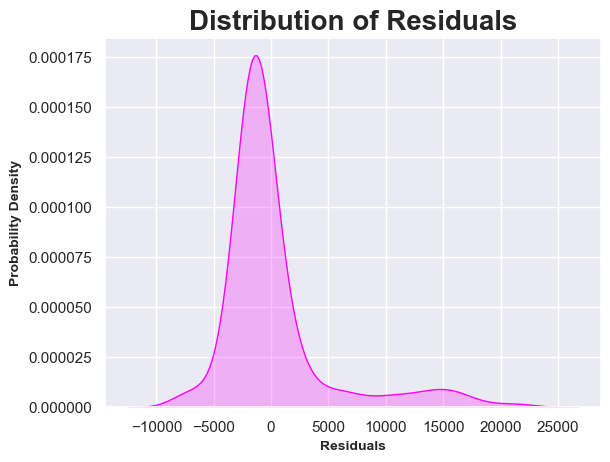

In [110]:
# To visualize the distribution of residuals.

lasso_poly_residuals = y_test - lasso_pred_poly

sns.kdeplot(x = lasso_poly_residuals, shade = True, color = 'magenta')
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Probability Density', fontsize = 10, fontweight = 'bold')
plt.show()

The residuals have become comparatively lower than the previous models.

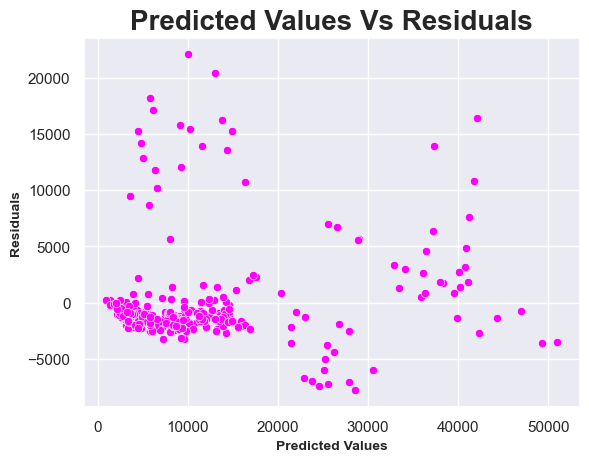

In [111]:
# To visualize the predicted value Vs residuals.

sns.scatterplot(x = lasso_pred_poly, y = lasso_poly_residuals, color = 'magenta')
plt.title('Predicted Values Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

The residuals values are close to zero and only datapoints are under predicted & over predicted.

In [112]:
# Let's summarize the R2 Scores for all the models.

accuracy_scores = pd.DataFrame({
    'Model' : ['Linear Regression','Ridge Regression','Lasso Regression','Linear Regression with Poly Features',
              'Ridge Regression with Poly Features', 'Lasso Regression with Poly Features'],
    'Accuracy Scores(R2)':[lin_r2score_test,ridge_r2score_test,lasso_r2score_test,lin_reg_poly_r2score_test,
                          ridge_poly_r2score_test,lasso_poly_r2score_test]
})

accuracy_scores

Model  Accuracy Scores(R2)
0                     Linear Regression             0.734305
1                      Ridge Regression             0.734152
2                      Lasso Regression             0.734178
3  Linear Regression with Poly Features             0.839475
4   Ridge Regression with Poly Features             0.846661
5   Lasso Regression with Poly Features             0.846698

After performing Polynomial Regression, we can observe that all the models are performing with a good accuracy.

In [114]:
# To convert Lasso Regression with Poly Features model into pickle format.

# One Hot Encoder.
# Standard Scaler.
# PolynomialFeatures.
# Lasso Regression model.

pickle.dump(ohe_encoder,open('OneHotEncoder.pkl','wb'))
pickle.dump(scaler_copy,open('StandardScaler.pkl','wb'))
pickle.dump(regular_poly,open('Polynomial.pkl','wb'))
pickle.dump(lasso_reg_poly,open('LassoRegPoly.pkl','wb'))

In [198]:
X_train_copy_corr.head()

age    bmi  smoker_yes
737    26  23.70           0
369    18  30.40           0
284    52  31.20           0
1302   25  20.80           0
958    43  34.96           1

In [123]:
X_train_copy.head()

age    bmi  children  sex_male  smoker_yes  region_northwest  \
737    26  23.70         2         1           0                 0   
369    18  30.40         3         1           0                 0   
284    52  31.20         0         0           0                 0   
1302   25  20.80         1         0           0                 0   
958    43  34.96         1         1           1                 0   

      region_southeast  region_southwest  
737                  0                 1  
369                  0                 0  
284                  0                 1  
1302                 0                 1  
958                  0                 0

In [124]:
X_test_copy.head()

age    bmi  children  sex_male  smoker_yes  region_northwest  \
1099   25  33.99         1         0           0                 0   
759    18  38.17         0         1           1                 0   
215    41  37.10         2         0           0                 0   
903    49  36.85         0         1           0                 0   
989    24  20.52         0         0           1                 0   

      region_southeast  region_southwest  
1099                 1                 0  
759                  1                 0  
215                  0                 1  
903                  1                 0  
989                  0                 0

In [70]:
X_train.head()

age     sex    bmi  children smoker     region
737    26    male  23.70         2     no  southwest
369    18    male  30.40         3     no  northeast
284    52  female  31.20         0     no  southwest
1302   25  female  20.80         1     no  southwest
958    43    male  34.96         1    yes  northeast

In [71]:
X_test.head()

age     sex    bmi  children smoker     region
1099   25  female  33.99         1     no  southeast
759    18    male  38.17         0    yes  southeast
215    41  female  37.10         2     no  southwest
903    49    male  36.85         0     no  southeast
989    24  female  20.52         0    yes  northeast

In [ ]:
# Models Used:
# ===========
# Linear Regression.
# Ridge Regression.
# Lasso Regression.
# Linear Regression with Polynomial Features.
# Ridge Regression with Polynomial Features.
# Lasso Regression with Polynomial Features.

# After model training, below are the steps to be checked.
# Compare Actual & Predicted Values.
# Coefficients & intercept.
# Linearity Check.
# Performance Evaluation.
# Normality of Residuals.
# Predicted Values Vs Residuals.

In [ ]:
# Points to Note:
# 1. Correlation is applicable only for numerical features.
# 2. When perform One Hot Encoding for train & test data, always ensure that index of training & testing data should
#    be provided respectively. This is to avoid issues during concatenation.